# Introdução

Considere um teste de hipóteses sobre duas amostras em que queremos verificar se essas amostras são ou não provenientes da mesma população. Já estudamos abordagens paramétricas para realizar essa tarefa ($z$-teste, $t$-teste, ANOVA). Agora, vamos estudar uma abordagem não-paramétrica para realizar esse tipo de teste. Essa abordagem é denominada teste de permutação (*permutation test*).

> Quando usar o teste de permutação? Quando os tamanhos amostrais são muito pequenos e, portanto, é difícil verificar o pressuposto de normalidade, o teste de permutação é uma boa alternativa ao teste t convencional ou ao teste t de Welch.

Considere duas amostras em que cada indivíduo (observação) está associado a um rótulo que identifica a que amostra o indivíduo pertence. Nesse contexto, podemos definir a hipótese nula da seguinte forma:

> $H_0$: "não há diferença estatisticamente significativa entre as médias das duas amostras".

Suponha que a hipótese nula seja verdadeira. Nesse caso, as duas amostras de observações são provenientes da mesma população, e qualquer diferença entre as suas médias se deve única e exclusivamente ao acaso. Isso significa mais ainda que os rótulos que identificam a que amostra cada indivíduo pertence são irrelevantes e poderíamos permutar indíviduos entre as duas amostras sem mudança no resultado do teste.

A argumentação acima sugere um procedimento para criar uma aproximação para a *distribuição nula* (i.e., a distribuição amostral da estatística de interesse, supondo que a hipótese nula seja verdadeira). Vamos descrever esse procedimento em seguida.

# Geração da distribuição nula empírica

O procedimento para gerar uma aproximação para a distribuição nula envolve criar muitos pares de **reamostras** a partir do par de amostras originais. Cada par de reamostras é criado permutando aleatoriamente os indivíduos do par de amostras originais. Após a criação das reamostras, computamos a estatística de teste para cada uma delas. Esse conjunto de valores é então usado para produzir uma aproximação para a distribuição nula.

> **Ideia central**: Se a hipótese nula $H_0$ for verdadeira (i.e., se as duas amostras originais são provenientes da mesma população), então cada amostra permutada terá a mesma probabilidade de ocorrer como qualquer outra. Portanto, quaisquer diferenças observadas serão pequenas e aleatórias se $H_0$ for verdadeiro.

Pelo exposto acima, podemos definir o procedimento para gerar a distribuição nula. Esse procedimento é descrito a seguir.

### Procedimento (geração da distribuição nula)

Entrada: duas amostras de tamanhos $n_1$ e $n_2$, respectivamente.

1. Calcule a estatística de interesse $T_{\text{obs}}$ (como diferença de médias, medianas, etc.). Po exemplo, se a estatística de interesse for a diferença de médias das observações em cada grupo ($\overline{x}_{1}$ e $\overline{x}_{2}$), então $T_{\text{obs}} = \overline{x}_{1} - \overline{x}_{2}$.

2. Agrupe as observações das duas amostras, o que resulta em uma única amostra.

3. Permute aleatoriamente as observações agrupadas na amostra única. (Ou seja, reorganize a ordem dos dados agrupados de maneira aleatória.)

4. Calcule a média da amostra para as primeiras $n_1$ observações resultantes da etapa 3. Em seguida, calcule a média da amostra das $n_2$ observações restantes.

5. Repita as etapas 3 e 4 por $B$ iterações e compute as diferenças entre as médias das remostras resultantes: $d_1,\ldots, d_B$.

Se repetirmos o procedimento descrito acima de permutar aleatoriamente os dados agrupados $B$ vezes, o resultado será um conjunto de $B$ diferenças entre as médias amostrais resultantes, que rotulamos como $d_1, \ldots, d_B$. Esses valores são então usados para gerar a aproximação para a distribuição nula.

### Exemplo

Para ilustrar a aplicação do procedimento acima, considere as duas amostras abaixo, de tamanhos $n_1 = 4$ e $n_2 = 5$.

- Grupo 1:	$6,	19,	34,	15$
- Grupo 2:	$9,	21,	8,	53, 25$

Os passos do procedimento aplicados neste caso são descritos a seguir.

1. Conforme descrito no passo 1, computamos a média do grupo 1 é ($\overline{x}_1 = 18.5$), e do grupo 2 ($\overline{x}_2 = 23.2$). Computamos também a diferença entre essas médias: $d = 18.5 - 23.2 = -4.7$

2. Agora agrupamos as observações de ambos os grupos, o que produz o seguinte:

$$
6,	19,	34,	15, 9,	21,	8,	53, 25
$$

3. Em seguida, permutamos os dados agrupados de forma aleatória. Para fins ilustrativos, suponha que o resultado da permutação seja: $34, 21, 8, 25, 6, 19, 15, 9, 53$. Essa permutação corresponde ao seguinte par de reamostras:

  - $R_1$: $34, 21, 8, 25$
  - R$_2$: $6, 19, 15, 9, 53$

4. A média amostral para a $R_1$ é igual a $22$, e para $R_2$ é igual a $20.4$. Sendo assim, a diferença entre essas médias é $d_1 = 22 - 20.4 = 1.6$.

### Quantidade de reamostras

No exemplo acima, repare que construímos um par de reamostras, de vários pares que poderiam ser construídos.

Você deve perceber que, para amostras originais de tamanhos $n_1$ e $n_2$, existem $(n_1+n_2)!$ permutações possíveis. Contudo, visto que a ordem dos elementos dentro de cada reamostra não é relevante, esse valor não corresponde à quantidade de reamostras possíveis. Em geral, dados o par de amostras originais de tamanhos $n_1$ e $n_2$, a quantidade de pares de reamostras possíveis que podem ser geradas é computada pela expressão a seguir:

$$
\text{quantidade de pares de reamostras} = \frac{(n_1 + n_2)!}{n_1!n_2!}
$$

O trecho de código a seguir ilustra de que forma essa quantidade pode ser computada usando a biblioteca itertools do Python.

In [141]:
import itertools
import numpy as np

a = [2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 0]
b = [35, 36, 37, 40, 50, 70, 60, 48, 50, 70, 60, 48]

uniao = a + b
reamostras = list(itertools.combinations(uniao, len(a)))

print(f"Há {len(reamostras)} pares de reamostras possíveis.")

Há 5200300 pares de reamostras possíveis.


Conforme ilustra a figura a seguir ([fonte](https://www.digitalocean.com/community/tutorials/js-big-o-notation)), a função fatorial cresce de forma muito acelerada.

<center><img src="https://assets.digitalocean.com/articles/alligator/js/big-o-notation/o-complexity.png" style="width:400px; margin-bottom:32px; background-color:#082767"/></center>

Para fins de comparação, considere os valores a seguir:

$$
\begin{align*}
\frac{5!}{e^5} & \approx 0.81 \\
\\
\frac{10!}{e^{10}} & \approx 164.7 \\
\\
\frac{15!}{e^{15}} & \approx 400000 \\
\\
\frac{20!}{e^{20}} &\approx 5014584787 \\
\\
\frac{25!}{e^{25}} &\approx 2 \times 10^{14}
\end{align*}
$$

Esse crescimento acelerado da função fatorial inviabiliza a geração de todas as reamostras possíveis, mesmo para valores modestos (i.e., pequenos) de $n_1 + n_2$. Por conta disso, normalmente um valor $B$ igual a 10000 para a quantiade de reamostras é normalmente usado na prática.

## Relação entre distribuição nula e $p$-valor

Lembre-se de que, para aplicar um teste de hipóteses, precisamos computar o $p$-valor correspondente ao valor da estatística de teste resultante do par de amostras originais.

A definição do $p$-value para o teste de permutação é a mesma que utilizamos nos testes paramétricos: probabilidade de obter o resultado observado da estatística de teste (ou um mais extremo), presumindo que a hipótese nula seja verdadeira. Entretanto, como no teste de permutação a distribuição nula (i.e., a distribuição amostral da estatística de teste considerando que a hipótese nula é verdadeira) não corresponde a uma distribuição teórica (como a distribuição normal ou a distribuição t), o que devemos fazer é calcular o $p$-value como a proporção dos valores no histograma da distribuição nula que são iguais ou mais extremos do que o valor observado no par de amostras original.

A animação a seguir ([fonte](https://en.wikipedia.org/wiki/Permutation_test)) ilustra de que forma a sequências de passos do procedimento descrito acima pode gerar a distribuição nula para uma estatística de interesse. Ela ilustra também a relação dessa distribuição com o $p$-valor. Em particular, o $p$-valor é computado como a fração de diferenças maiores ou iguais à diferença entre as amostras originais.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/1/12/Permutation_test_example_animation.gif" style="width:400px; margin-bottom:32px; background-color:#082767"/></center>

# Aplicação do teste

Esses são os passos para aplicação do teste de permutação:

1. **Calcule a estatística observada** $T_{\text{obs}}$ (como diferença de médias, medianas etc.).
2. **Reembaralhe aleatoriamente os rótulos** dos grupos (mantendo os tamanhos originais).
3. **Recalcule a estatística** para essa permutação.
4. **Repita** muitas vezes (geralmente > 1.000) para construir uma **distribuição nula empírica**.
5. **Compare** a estatística observada com essa distribuição para obter um **valor-p**.

# Exemplos

Nesta seção, são apresentados exemplos de como usar o teste de permutação para realizar testes de hipóteses.

Nos exemplos desta seção, considere que $\alpha = 0.05$.

## Exemplo 1 : Efeito de um Novo Programa de Treinamento

Uma empresa deseja avaliar a efetividade de um **novo programa de treinamento para melhorar a produtividade de seus funcionários**. Para isso, selecionou **dois grupos independentes de 30 funcionários cada**:

* **Grupo 1**: funcionários que **participaram** do novo programa de treinamento.
* **Grupo 2**: funcionários que **não participaram** do programa (grupo controle);

Após um mês, a produtividade de cada funcionário foi medida por meio de um escore de desempenho padronizado. Esse escore varia entre 0 e 100.

A média da produtividade foi de aproximadamente **50 para o grupo controle** e **55 para o grupo treinado**, com variações individuais dentro de cada grupo.

A empresa quer saber se a diferença observada entre as médias **pode ser atribuída ao acaso** ou se há **evidência estatística** de que o novo programa realmente **aumenta a produtividade**.

Para isso, decide aplicar um **teste de permutação com 10.000 reamostras**, comparando a diferença média de produtividade entre os grupos.

**Solução:** 

As hipóteses neste caso:

- $H_0: \mu_1 = \mu_2$
- $H_1: \mu_1 > \mu_2$

Isto corresponde ao caso em que **espera-se que o Grupo 1 (treinados) tenha média maior que o Grupo 2 (controle)**.



Veja código abaixo.

Diferença observada nas médias: 4.67
P-valor (unilateral): 0.0001


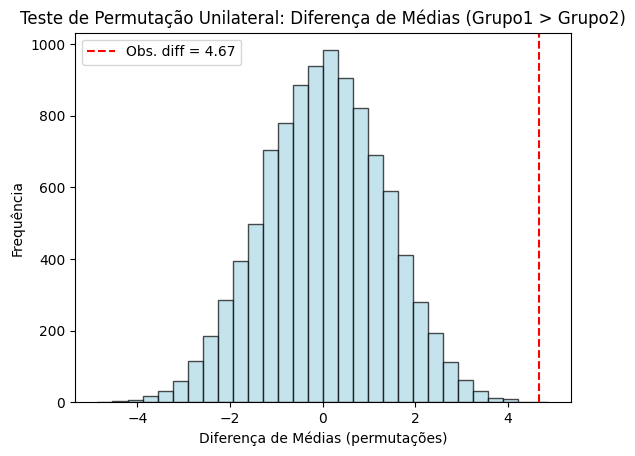

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def permutation_test_unilateral(group1, group2, num_permutations=1000):
    """
    Realiza um teste de permutação unicaudal (group1 > group2).
    """
    observed_diff = np.mean(group1) - np.mean(group2)
    combined = np.concatenate([group1, group2])

    perm_diffs = np.empty(num_permutations)
    for i in range(num_permutations):
        permuted = np.random.permutation(combined)
        perm_group1 = permuted[:len(group1)]
        perm_group2 = permuted[len(group1):]
        perm_diffs[i] = np.mean(perm_group1) - np.mean(perm_group2)

    p_value = np.mean(perm_diffs >= observed_diff)
    return observed_diff, perm_diffs, p_value

# ---------------------------
# Exemplo de uso
# ---------------------------
np.random.seed(42)
group1 = np.random.normal(55, 5, 30)  # Treinados
group2 = np.random.normal(50, 5, 30)  # Controle

observed_diff, perm_diffs, p_value = permutation_test_unilateral(group1, group2, num_permutations=10000)

print(f"Diferença observada nas médias: {observed_diff:.2f}")
print(f"P-valor (unilateral): {p_value:.4f}")

plt.hist(perm_diffs, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='dashed', label=f'Obs. diff = {observed_diff:.2f}')
plt.title('Teste de Permutação Unilateral: Diferença de Médias (Grupo1 > Grupo2)')
plt.xlabel('Diferença de Médias (permutações)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Dado que o **valor-p do teste unilateral é $p = 0{,}0001$**, e considerando um nível de significância usual de $\alpha = 0{,}05$, temos:

* Como $p < 0{,}05$, **rejeitamos a hipótese nula** $H_0$, que afirma que as médias dos dois grupos são iguais.
* Há **evidência estatística suficiente** para concluir que o **grupo 1 tem média maior que o grupo 2**.
* Portanto, os resultados sugerem que o **grupo treinado (grupo 1)** teve **um desempenho significativamente superior** ao grupo controle.

Em linguagem informal:

> A diferença observada nas médias dificilmente ocorreria por acaso se o treinamento não tivesse efeito. Assim, o teste indica que **o programa de treinamento teve um impacto positivo na produtividade**.

### Solução alternativa (versão vetorizada)

Na implementação anterior, utilizamos um **laço `for`** para gerar as permutações e calcular, uma a uma, as diferenças de médias entre os grupos.
Embora essa abordagem seja conceitualmente clara, ela se torna computacionalmente custosa quando o número de permutações é grande (por exemplo, 10.000 ou 100.000 reamostras).

Uma alternativa mais eficiente é explorar o **paralelismo implícito do NumPy**, gerando todas as permutações de uma só vez e realizando as operações de média e subtração de forma vetorizada.
Essa estratégia reduz o tempo de execução e elimina a necessidade de estruturas de repetição explícitas, preservando exatamente o mesmo raciocínio estatístico do teste de permutação.

Na prática, a vetorização não altera a lógica inferencial; apenas torna a implementação mais rápida e elegante, o que é especialmente útil em análises reais com grandes amostras ou em simulações que exigem muitas repetições.

Diferença observada entre as médias: 4.67
p-valor (unicaudal à direita): 0.0001


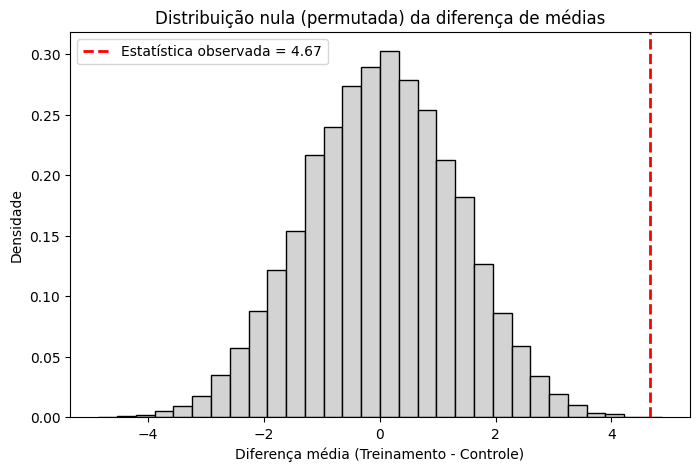

✅ Evidência significativa de que o programa aumentou a produtividade (rejeitamos H0).


In [143]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Teste de Permutação Unicaudal (Treinamento vs Controle)
# ============================================================

# 1. Gerar dados simulados
np.random.seed(42)
n1 = n2 = 30

# Grupo treinado e grupo controle
grupo_treinamento = np.random.normal(loc=55, scale=5, size=n1)
grupo_controle    = np.random.normal(loc=50, scale=5, size=n2)

# Estatística observada: diferença de médias
diff_obs = grupo_treinamento.mean() - grupo_controle.mean()
print(f"Diferença observada entre as médias: {diff_obs:.2f}")

# 2. Combinar dados (hipótese nula: grupos equivalentes)
dados = np.concatenate([grupo_treinamento, grupo_controle])
n_total = len(dados)

# 3. Teste de permutação vetorizado
n_perm = 10_000

# Criar matriz de índices permutados
idx = np.array([np.random.permutation(n_total) for _ in range(n_perm)])

# Repartir os dados permutados em dois grupos de tamanhos iguais
grupo_A = dados[idx[:, :n1]]
grupo_B = dados[idx[:, n1:]]

# Calcular diferenças de médias para todas as permutações de uma vez
diffs_perm = grupo_A.mean(axis=1) - grupo_B.mean(axis=1)

# 4. Calcular p-valor unicaudal (à direita)
p_val = np.mean(diffs_perm >= diff_obs)
print(f"p-valor (unicaudal à direita): {p_val:.4f}")

# 5. Visualizar a distribuição nula permutada
plt.figure(figsize=(8,5))
plt.hist(diffs_perm, bins=30, color='lightgray', edgecolor='black', density=True)
plt.axvline(diff_obs, color='red', linestyle='--', linewidth=2,
            label=f'Estatística observada = {diff_obs:.2f}')
plt.title('Distribuição nula (permutada) da diferença de médias')
plt.xlabel('Diferença média (Treinamento - Controle)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# 6. Conclusão
alpha = 0.05
if p_val < alpha:
    print("✅ Evidência significativa de que o programa aumentou a produtividade (rejeitamos H0).")
else:
    print("ℹ️ Não há evidência estatisticamente significativa de aumento de produtividade (falhamos em rejeitar H0).")


## Exemplo 2 - Chichen Data

Neste estudo de caso, vamos exemplificar a aplicação do teste de permutação usando os dados contidos no arquivo ChickData.csv. Esse arquivo contém observações sobre animais (filhotes de galináceos). Cada filhote recebeu um de dois tipos de dieta disponíveis desde seu nascimento. Após 3 semanas de vida, o peso de cada filhote foi medido. Nosso propósito é verificar se existe diferença estatisticamente significativa entre os dois tipos de dietas. Isto é, nosso objetivo é verificar a veracidade da seguinte afirmação:

> um dos tipos de dieta produz animais com uma média de pesos **diferente** do que o outro. 

**Solução**

Vamos iniciar definindo as hipóteses nula e alternativa. Considere que $\mu_d$ corresponda à diferença entre as médias de pesos das amostras.

- $H_0: \mu_{d} = 0$
- $H_a: \mu_{d} \neq 0$

Agora, vamos fazer a carga dos dados.

In [144]:
import pandas as pd

df_chick = pd.read_csv('../data/ChickData.csv')

print(df_chick.shape)

(23, 2)


In [145]:
df_chick.head(23)

,weight,feed
0,325,meatmeal
1,257,meatmeal
2,303,meatmeal
3,315,meatmeal
4,380,meatmeal
5,153,meatmeal
6,263,meatmeal
7,242,meatmeal
8,206,meatmeal
9,344,meatmeal


Note pelo histograma abaixo que a amostra unificada não parece seguir a distribuição normal, o que exclui a possiblidade de aplicar um teste paramétrico como o $t$-teste, por exemplo.

<Axes: >

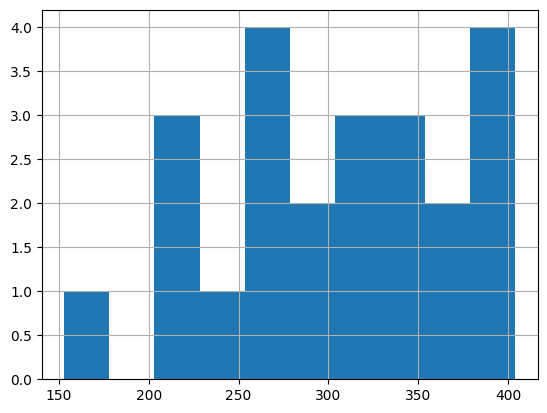

In [146]:
df_chick.weight.hist()

Repare que cada filhote recebeu um dos dois tipos de dieta (*meatmeal* ou *casein*).

In [147]:
df_chick.feed.unique()

array(['meatmeal', 'casein'], dtype=object)

Podemos também identificar os pesos (medidos após três semanas de vida) dos filhotes que receberam cada tipo de dieta, conforme os dois blocos de código abaixo. Esses dois conjuntos de pesos correspondem ao par de amostras original.

In [148]:
df_chick.loc[df_chick['feed'] == 'meatmeal', 'weight'].tolist()

[325, 257, 303, 315, 380, 153, 263, 242, 206, 344, 258]

In [149]:
df_chick.loc[df_chick['feed'] == 'casein', 'weight'].tolist()

[368, 390, 379, 260, 404, 318, 352, 359, 216, 222, 283, 332]

Agora, podemos computar a diferença observada entre as médias de pesos dos animais em cada tipo de dieta.

In [150]:
import numpy as np

list_meatmeal = df_chick.loc[df_chick['feed'] == 'meatmeal', 'weight'].tolist()
list_casein = df_chick.loc[df_chick['feed'] == 'casein', 'weight'].tolist()

agg_list = list_meatmeal + list_casein

sample_meatmeal = np.array(list_meatmeal)
sample_casein = np.array(list_casein)
agg_sample = np.array(agg_list)

print(sample_meatmeal.mean())
print(sample_casein.mean())
print(agg_sample.mean())

observed_diff = sample_meatmeal.mean() - sample_casein.mean()
print('Diferença observada no par de amostras original: %.2f' % observed_diff)

276.90909090909093
323.5833333333333
301.2608695652174
Diferença observada no par de amostras original: -46.67


Agora vamos construir a distribuição da estatística. Para isso, precisamos inicialmente produzir diferentes pares de reamostras. Em seguida, para cada par de reamostra gerado, computamos a diferença entre suas médias de pesos. O conjunto de valores assim gerado é então usado para produzir uma estimativa da distribuição amostral da estatística de interesse.

In [151]:
import random

debug = False

a_perm = list_meatmeal + list_casein
B = 10000 # total de pares de reamostras a ser gerado
diffs = np.zeros(B)
for i in range(B):
  random.shuffle(a_perm)
  mean_first_resample = np.array(a_perm[:12]).mean()
  mean_second_resample = np.array(a_perm[12:]).mean()

  if debug:
    print(a_perm)
    print(a_perm[:12])
    print(a_perm[12:])
    print()

  diffs[i] = mean_first_resample - mean_second_resample

O código acima produz $10000$ pares de reamostras, cada um dos quais é usado para computar um valor da estatística.

In [152]:
diffs.shape

(10000,)

Para fins de inspeção, observe abaixo os primeiros quinze valores computados.

In [153]:
print(diffs[:15])

[-55.43181818  -9.25757576   5.20454545  13.21969697  24.02272727
   3.11363636  18.96969697   9.21212121  12.6969697   11.82575758
  47.89393939  -2.28787879 -19.01515152  32.73484848  13.39393939]


Agora, tomando todos os $10000$ valores, podemos produzir o gráfico da distribuição amostral empírica (i.e., da distribuição nula) da estatística, conforme o bloco de código a seguir.

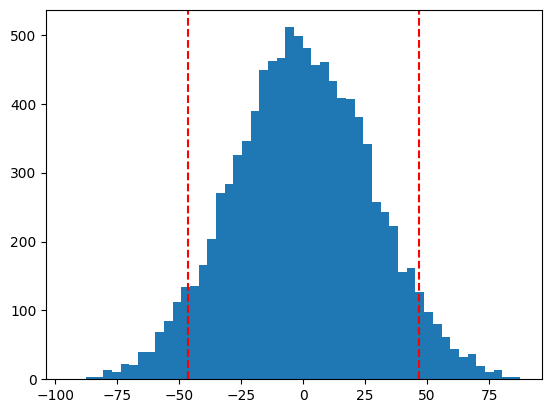

In [154]:
import matplotlib.pyplot as plt

_ = plt.hist(diffs, bins='auto')
plt.axvline(observed_diff, c='r', linestyle='--');
plt.axvline(-observed_diff, c='r', linestyle='--');

Repare que no gráfico da distribuição nula acima, também foi destacado o valor crítico em ambas as caudas da distribuição (linhas tracejadas em vermelho). O $p$-valor nesse caso corresponde à proporção de valores da estatística de teste que são iguais ou mais extremos do que o valor observado no par de amostras originais.

In [155]:
np.where(diffs > observed_diff)[0].shape[0]

9492

In [156]:
np.where(diffs < -observed_diff)[0].shape[0]

9523

In [157]:
np.where(diffs > observed_diff)[0].shape[0] + np.where(diffs < -observed_diff)[0].shape[0]

19015

Já que sabemos a quantidade de valores da estatística que são tão ou mais extremos do que o valor crítico, podemos usar essa quantidade para computar o $p$-valor.

Repare que, diante da forma como a hipótese alternativa foi definida, devemos realizar um *teste bilateral*. Isso significa que devemos somar as quantidades de valores da estatística para ambas as caudas da distribuição.

In [158]:
p_val = np.mean(np.abs(diffs) >= abs(observed_diff))
p_val

0.0985

Se considerarmos que o nível de significância definido para o estudo foi $\alpha = 0.05$, então a conclusão a que chegamos é a de que não podemos rejeitar a hipótese nula, visto que $p > \alpha$. Sendo assim, não há evidência suficiente para afirmar que os dois tipos de dieta são diferentes em sua efetividade em termos de ganho de peso.

### Versão vetorizada

   weight      feed
0     325  meatmeal
1     257  meatmeal
2     303  meatmeal
3     315  meatmeal
4     380  meatmeal
Dietas disponíveis: ['meatmeal' 'casein']
Tamanho do grupo 1 (meatmeal): 11
Tamanho do grupo 2 (casein): 12
Diferença observada entre as médias: -46.67
p-valor (bicaudal): 0.0997


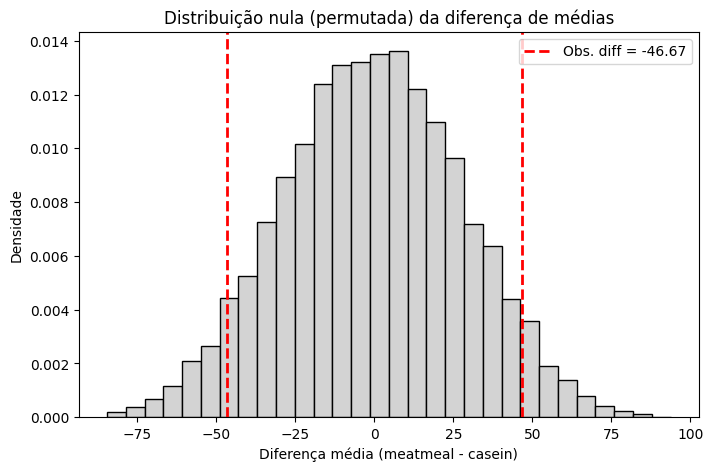

ℹ️ Não há evidência estatisticamente significativa de diferença entre as dietas (falhamos em rejeitar H0).


In [159]:
# ============================================================
# Teste de Permutação Bicaudal: Dados ChickData.csv (GitHub)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Ler o arquivo de dados diretamente do GitHub
# ------------------------------
url = "../data/ChickData.csv"
df = pd.read_csv(url)
print(df.head())

# ------------------------------
# 2. Inspecionar os grupos
# ------------------------------
grupos = df['feed'].unique()
print(f"Dietas disponíveis: {grupos}")

grupo1 = df.loc[df['feed'] == grupos[0], 'weight'].values
grupo2 = df.loc[df['feed'] == grupos[1], 'weight'].values

print(f"Tamanho do grupo 1 ({grupos[0]}): {len(grupo1)}")
print(f"Tamanho do grupo 2 ({grupos[1]}): {len(grupo2)}")

# ------------------------------
# 3. Estatística observada
# ------------------------------
observed_diff = np.mean(grupo1) - np.mean(grupo2)
print(f"Diferença observada entre as médias: {observed_diff:.2f}")

# ------------------------------
# 4. Teste de permutação (bicaudal)
# ------------------------------
n_perm = 10_000
combined = np.concatenate([grupo1, grupo2])

# Gerar todas as permutações de forma vetorizada
idx = np.array([np.random.permutation(len(combined)) for _ in range(n_perm)])
grupoA = combined[idx[:, :len(grupo1)]]
grupoB = combined[idx[:, len(grupo1):]]
diffs_perm = grupoA.mean(axis=1) - grupoB.mean(axis=1)

# p-valor bicaudal
p_val = np.mean(np.abs(diffs_perm) >= abs(observed_diff))
print(f"p-valor (bicaudal): {p_val:.4f}")

# ------------------------------
# 5. Visualização
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(diffs_perm, bins=30, color='lightgray', edgecolor='black', density=True)
plt.axvline(observed_diff, color='red', linestyle='--', linewidth=2,
            label=f'Obs. diff = {observed_diff:.2f}')
plt.axvline(-observed_diff, color='red', linestyle='--', linewidth=2)
plt.title('Distribuição nula (permutada) da diferença de médias')
plt.xlabel(f'Diferença média ({grupos[0]} - {grupos[1]})')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# ------------------------------
# 6. Conclusão
# ------------------------------
alpha = 0.05
if p_val < alpha:
    print("✅ Evidência significativa de que as médias de peso diferem entre as dietas (rejeitamos H0).")
else:
    print("ℹ️ Não há evidência estatisticamente significativa de diferença entre as dietas (falhamos em rejeitar H0).")

## Exemplo 3 - Dados categóricos

O teste de permutação também pode ser usado com dados categóricos, principalmente quando queremos verificar se duas variáveis categóricas são independentes. 

Um exemplo clássico: verificar se a proporção de sucessos difere entre dois grupos — ou seja, se a distribuição de uma variável binária difere entre dois níveis de uma variável de agrupamento. 

Considere que:

- Temos duas versões de uma campanha de marketing: Grupo A e Grupo B.

- Em cada grupo, medimos sucesso (1) ou fracasso (0).

> Queremos saber: há evidência de que as taxas de sucesso são diferentes entre os grupos?

Veja o código abaixo.

Diferença observada nas proporções: 0.280
Valor-p (teste bilateral): 0.0060


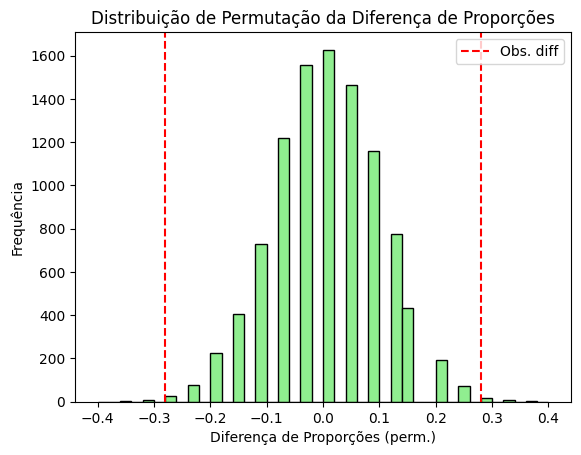

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Dados simulados
# ---------------------------
np.random.seed(42)
group_A = np.random.binomial(n=1, p=0.30, size=50)  # 30% sucesso
group_B = np.random.binomial(n=1, p=0.50, size=50)  # 50% sucesso

# Estatística observada: diferença nas proporções de sucesso
obs_diff = np.mean(group_B) - np.mean(group_A)
print(f"Diferença observada nas proporções: {obs_diff:.3f}")

# ---------------------------
# 2. Permutation test
# ---------------------------
combined = np.concatenate([group_A, group_B])
n_A = len(group_A)
n_permutations = 10000
perm_diffs = []

for _ in range(n_permutations):
    permuted = np.random.permutation(combined)
    perm_A = permuted[:n_A]
    perm_B = permuted[n_A:]
    diff = np.mean(perm_B) - np.mean(perm_A)
    perm_diffs.append(diff)

perm_diffs = np.array(perm_diffs)

# ---------------------------
# 3. Valor-p (teste bilateral)
# ---------------------------
p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
print(f"Valor-p (teste bilateral): {p_value:.4f}")

# ---------------------------
# 4. Visualização
# ---------------------------
plt.hist(perm_diffs, bins=40, color='lightgreen', edgecolor='k')
plt.axvline(obs_diff, color='red', linestyle='--', label='Obs. diff')
plt.axvline(-obs_diff, color='red', linestyle='--')
plt.title('Distribuição de Permutação da Diferença de Proporções')
plt.xlabel('Diferença de Proporções (perm.)')
plt.ylabel('Frequência')
plt.legend()
plt.show()


O teste acima avalia se as proporções de sucesso entre os grupos A e B são estatisticamente diferentes. Como nos casos contínuos, o valor-p é a fração de permutações em que a diferença de proporções é tão (ou mais) extrema do que a observada.

Conclusão do teste:
- Visto que $p < \alpha$, rejeitamos a hipótese nula $H_0$ .
- Isso significa que há evidência estatística significativa de que as proporções de sucesso nos grupos A e B são diferentes.
- Ou seja, a diferença observada (de 20 pontos percentuais) dificilmente ocorreria por acaso, se os dois grupos tivessem a mesma taxa de sucesso.

# Referências comentadas

- Veja esse [vídeo](https://youtu.be/xRzEWLfEEIA) para uma demonstração de como o teste apresentado aqui pode ser realizado em R.
- Este [capítulo do livro](https://www.macmillanlearning.com/studentresources/college/statistics/bps8e/web_exercises/42578_ch32_online.pdf) também é relevante para o conteúdo aqui apresentado.